# `physipy` and `matplotlib`
Besides matplotlib being the most-used, most-documented, and most mature plotting package in python, a good reason to use it is its ability to handle units automatically, through its units interface.

There are 2 ways to use `matplotlib` with `physipy`:

 1. Wihtout making `matplotlib` aware of the units : every quanity will be converted into standard types (float or np.ndarray) using the `Quantity` value, i.e. expressed in SI-unit
 2. Make `matplotlib` aware of `physipy`'s units : with just one line of code, we can make `matplotlib` to automatically handle `physipy` objects.

## Default plotting with matplotlib
By default, Quantity' are plotted with their raw value, ie si-unit value ; the unit is stripped of the `Quantity` and converted into regular `float`:

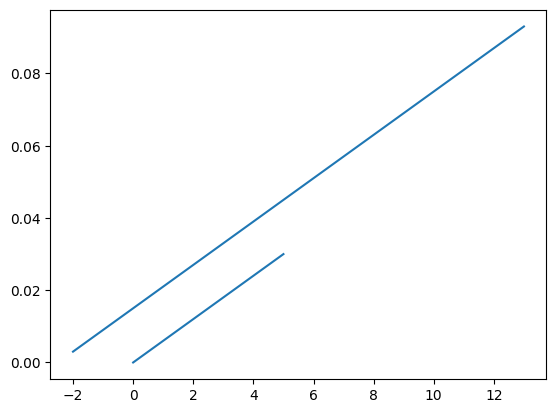

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from physipy import s, units

mm = units['mm']

y = np.linspace(0, 30) * mm
x = np.linspace(0, 5) * s

fig, ax = plt.subplots()
ax.plot(x, y, 'tab:blue')
ax.plot(3*x-2*s, 3*y+3*mm)

## Exploit `matplotlib` unit interface

We can activate the handling of units either : 

 1. globaly, by calling a function once to activate (call again to de-activate) : `physipy.setup_matplotlib()`
 2. using a context that will activate/deactivate when entering/exiting the context : `with physipy.plotting_context()`


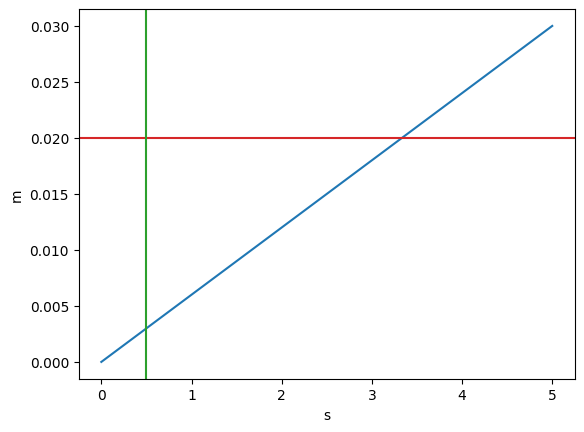

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from physipy import s, m, units, setup_matplotlib, plotting_context

ms = units["ms"]
mm = units['mm']
km = units["km"]
cm = units["cm"]

# at this point, matplotlib is un-aware of physipy

# we can activate the unit interface only during our plotting : 
with plotting_context():            # activated here
    y = np.linspace(0, 30) * mm
    x = np.linspace(0, 5) * s
    
    fig, ax = plt.subplots()
    ax.plot(x, y, 'tab:blue')
    ax.axhline(0.02 * m, color='tab:red')
    ax.axvline(500*ms, color='tab:green')
# de-activated here when exiting the context
# notice that the units are automatically added to the axis labels


We can activate the interafec for a whole script (again, notice the automaticaly added units to the labels):

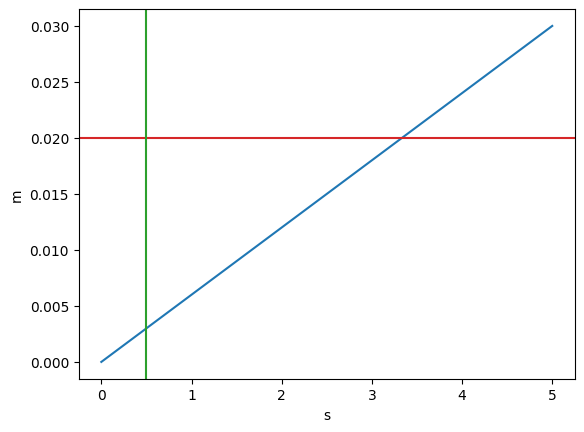

In [2]:
# activated here
setup_matplotlib()

y = np.linspace(0, 30) * mm
x = np.linspace(0, 5) * s

fig, ax = plt.subplots()
ax.plot(x, y, 'tab:blue')
ax.axhline(0.02 * m, color='tab:red')
ax.axvline(500*ms, color='tab:green')

### Using `favunit` and custom units

The true power of the unit interface come with the hability to handle displaying quantities in terms of their `favunit` or even any other unit. You can use mainly 2 approaches : 

 - manually set custom units to any axis
 - define `favunit` for the variables you are plotting

If you use the same units, both approaches will lead to identical plots (see the next 2 examples).

The example below sets `ms` as the unit for the x-axis and `mm` as the unit for the y-axis : 

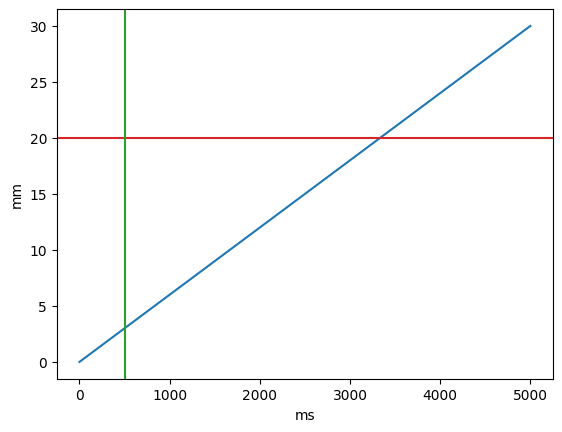

In [13]:
import matplotlib.pyplot as plt
import numpy as np

y = np.linspace(0, 30) * mm
x = np.linspace(0, 5) * s

fig, ax = plt.subplots()
ax.yaxis.set_units(mm)
ax.xaxis.set_units(ms)

ax.plot(x, y, 'tab:blue')
ax.axhline(0.02 * m, color='tab:red')
ax.axvline(500*ms, color='tab:green')

Create the same plot, but using the `favunit` of the data being plotted : 

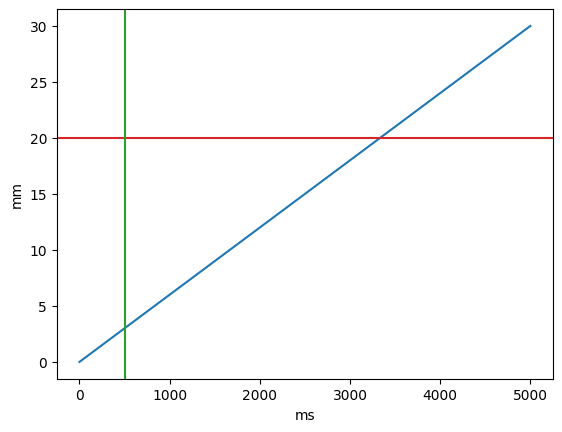

In [5]:
y = np.linspace(0, 30) * mm
x = np.linspace(0, 5) * s

x.favunit = ms  # no need to call ax.xaxis.set_units(ms)
y.favunit = mm  # no need to call ax.yaxis.set_units(mm)

fig, ax = plt.subplots()

ax.plot(x, y, 'tab:blue')
ax.axhline(0.02 * m, color='tab:red')
ax.axvline(500*ms, color='tab:green')

The axis units can be changed after the values are plotted as well : 

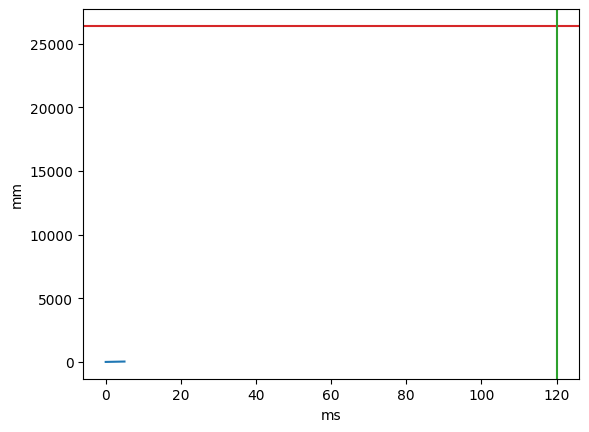

In [6]:
y = np.linspace(0, 30) * mm
x = np.linspace(0, 5) * ms

fig, ax = plt.subplots()
ax.plot(x, y, 'tab:blue')
ax.axhline(26400 * mm, color='tab:red')
ax.axvline(120 * ms, color='tab:green')
ax.yaxis.set_units(mm)
ax.xaxis.set_units(ms)
ax.autoscale_view()

## More examples

### setting limits of an axes

1 s
1 m
(2.0, 3.0)
(0.025400000000000002, 0.1778)


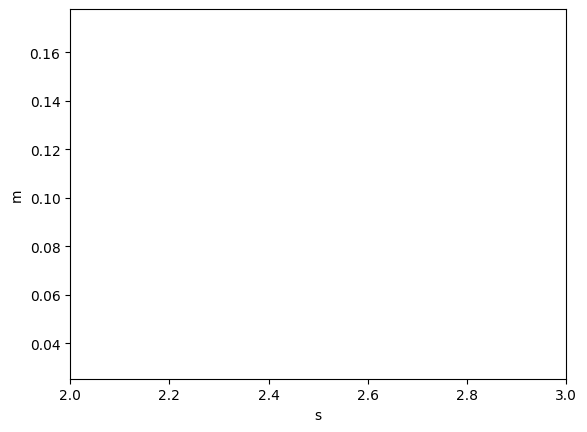

In [16]:
import matplotlib.pyplot as plt
from physipy import units, s, imperial_units, setup_matplotlib, m
inch = imperial_units["in"]
setup_matplotlib()
 
fig, ax = plt.subplots()
ax.set_xlim(2*s,3*s)
ax.set_ylim(1*inch, 7*inch)
print(ax.xaxis.units)
print(ax.yaxis.units)
print(ax.get_xlim())
print(ax.get_ylim())

### Axis methods to handle units

True
True
True
1 s
1 s
None
0.001 s


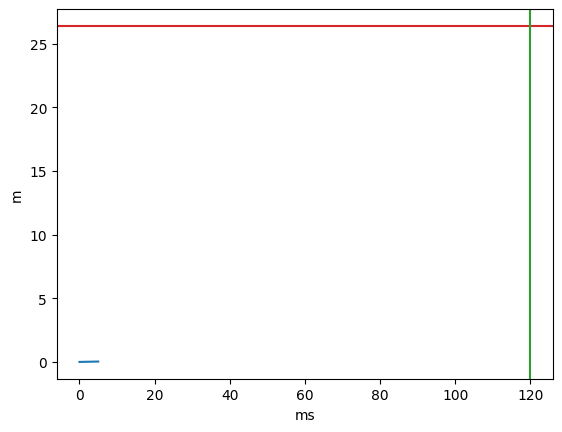

In [14]:
setup_matplotlib()
y = np.linspace(0, 30) * mm
x = np.linspace(0, 5) * ms

fig, ax = plt.subplots()
ax.plot(x, y, 'tab:blue')
ax.axhline(26400 * mm, color='tab:red')
ax.axvline(120 * ms, color='tab:green')
#ax.yaxis.set_units(mm)
#ax.xaxis.set_units(ms)
ax.autoscale_view()

print(ax.xaxis.have_units())
print(ax.yaxis.have_units()) 
print(ax.xaxis.have_units())
print(ax.xaxis.converter)
print(ax.xaxis.units)
print(ax.xaxis.get_units())
print(ax.xaxis.set_units(ms))
print(ax.xaxis.get_units())

### twin axes

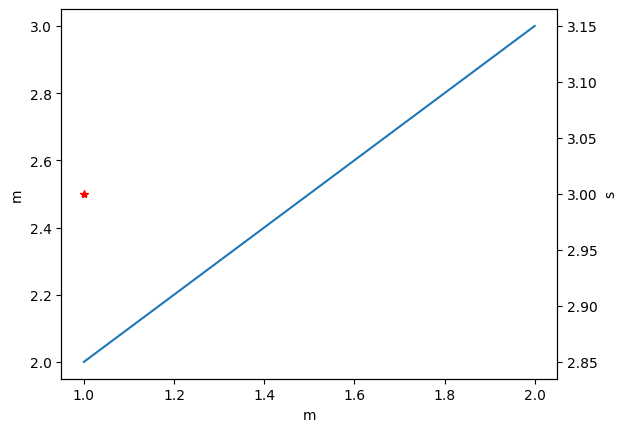

In [15]:
import matplotlib.pyplot as plt
import numpy as np

import physipy
from physipy import s, m, setup_matplotlib
from physipy.quantity.utils import asqarray

from physipy import Dimension, units, quantify, Quantity
setup_matplotlib()

import matplotlib.units as munits
print(munits.registry.get_converter([1*m]))

fig, ax = plt.subplots()
ax.plot(asqarray([m, 2*m]),
        asqarray([2*m, 3*m]))#, "-o")
ax2 = ax.twinx()
ax2.plot(m, 3*s, "*", color="r")

### scatterplot and masked array

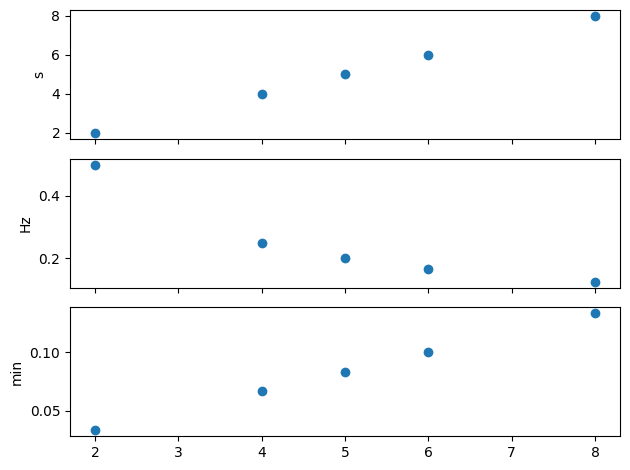

In [13]:
import numpy as np
import matplotlib.pyplot as plt
#from basic_units import secs, hertz, minutes
from physipy import units, setup_matplotlib
setup_matplotlib()
secs = units["s"]
hertz = units["Hz"]
minutes = units["min"]

# create masked array
data = (1, 2, 3, 4, 5, 6, 7, 8)
mask = (1, 0, 1, 0, 0, 0, 1, 0)
xsecs = secs * np.ma.MaskedArray(data, mask, float)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True)

ax1.scatter(xsecs, xsecs)
ax2.scatter(xsecs, 1/xsecs, yunits=hertz)
ax3.scatter(xsecs, xsecs, yunits=minutes)

fig.tight_layout()
plt.show()

### units

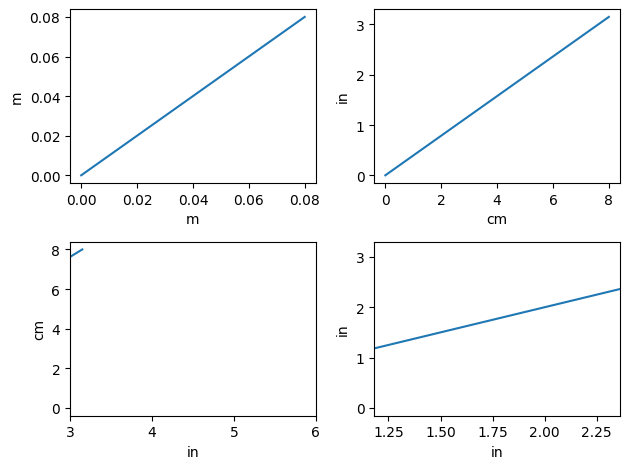

In [14]:
import matplotlib.pyplot as plt
import numpy as np

cms = cm * np.arange(0, 10, 2)

fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(cms, cms)

axs[0, 1].plot(cms, cms, xunits=cm, yunits=inch)

axs[1, 0].plot(cms, cms, xunits=inch, yunits=cm)
axs[1, 0].set_xlim(3, 6)  # scalars are interpreted in current units

axs[1, 1].plot(cms, cms, xunits=inch, yunits=inch)
axs[1, 1].set_xlim(3*cm, 6*cm)  # cm are converted to inches
plt.tight_layout()
plt.show()

### Bar plots

Based on https://matplotlib.org/stable/gallery/units/bar_unit_demo.html

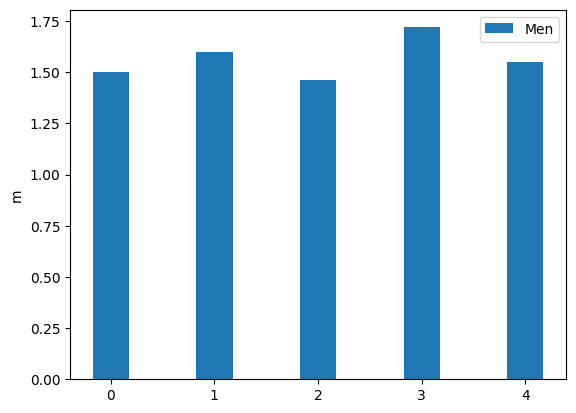

In [10]:
import numpy as np
#from basic_units import cm, inch
from physipy import units, imperial_units, setup_matplotlib
from physipy.quantity.utils import asqarray
import matplotlib.pyplot as plt

cm = units["cm"]
inch = imperial_units["in"]


N = 5
men_means = asqarray([150*cm, 160*cm, 146*cm, 172*cm, 155*cm])
men_std = asqarray([20*cm, 30*cm, 32*cm, 10*cm, 20*cm])

fig, ax = plt.subplots()

ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars
ax.bar(ind, 
       men_means, 
       width,
       bottom=0*cm, 
       #yerr=men_std, 
       label='Men')

#women_means = (145*cm, 149*cm, 172*cm, 165*cm, 200*cm)
#women_std = (30*cm, 25*cm, 20*cm, 31*cm, 22*cm)
#ax.bar(ind + width, women_means, width, bottom=0*cm, yerr=women_std,
#       label='Women')

#ax.set_title('Scores by group and gender')
#ax.set_xticks(ind + width / 2, labels=['G1', 'G2', 'G3', 'G4', 'G5'])

ax.legend()
#ax.yaxis.set_units(inch)
#ax.autoscale_view()

plt.show()

## Ressources
Leaving this here for further research :

 - https://github.com/matplotlib/matplotlib/blob/97115aef5c18af5e48eb4ef041b6f48567088874/lib/matplotlib/axis.py#L1521
 - See astropy for plotting context : https://docs.astropy.org/en/stable/_modules/astropy/visualization/units.html#quantity_support
 - Astropy known issues : https://docs.astropy.org/en/stable/known_issues.html#quantity-issues
 - artist : https://github.com/matplotlib/matplotlib/blob/87119ea07357bc065bf729bfb7cd35e16dffe91b/lib/matplotlib/artist.py#L188